결정트리 사용하기 
먼저 수단으로 from sklearn.tree import DecisionTreeClassifier를 불러온다.
수단으로 sklearn.datasets.load_iris불러 온다.
수단으로 sklearn.model_selection.train_test_split불러온다.


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=10)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================


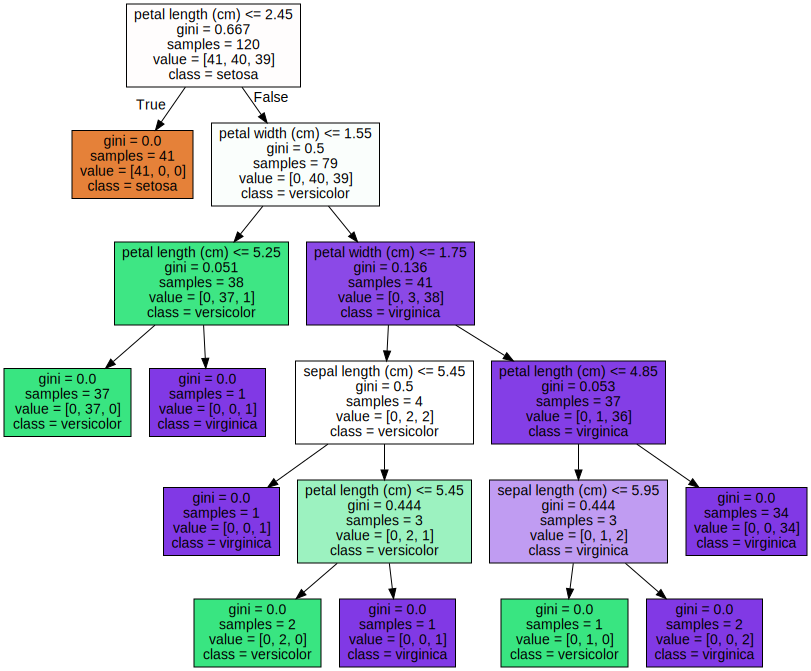

In [3]:
print('===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

 Feature Importance : 
 [0.025 0.    0.555 0.42 ]

sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

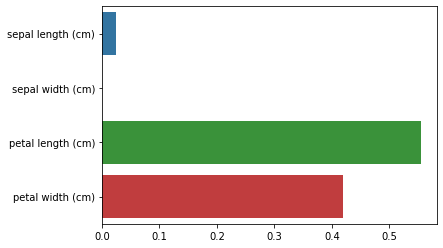

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

print(" Feature Importance : \n {0}\n".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)

Feature Importances:
[0.025 0.    0.555 0.42 ]

sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

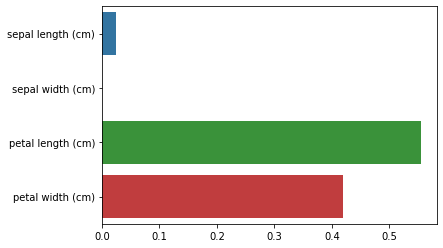

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [20]:
titanic_df = pd.read_csv("./titanic/train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1) 
X_titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
def fillna(df) :
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

def drop_features(df) :
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

def format_features(df) :
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [22]:
X_titanic_df = transform_features(X_titanic_df)

In [23]:
titanic_clf = DecisionTreeClassifier(random_state=121)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size = 0.2, random_state=121)

In [ ]:
titanic_clf = DecisionTreeClassifier(random_state=121)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, 
                                                    test_size = 0.2, random_state=121))

In [ ]:
print(f'Feature Importance')

Feature Importance : [0.0745 0.3198 0.224  0.0488 0.0325 0.2226 0.056  0.0218]
Pclass : 0.074
Sex : 0.320
Age : 0.224
SibSp : 0.049
Parch : 0.033
Fare : 0.223
Cabin : 0.056
Embarked : 0.022


<AxesSubplot:>

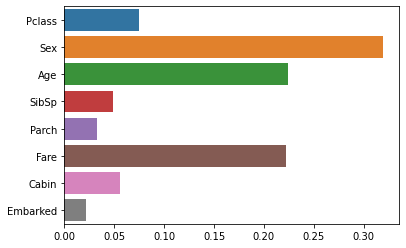

In [28]:
# feature importance 추출
print(f"Feature Importance : {np.round(titanic_clf.feature_importances_, 4)}")

# feature 별 importance 매핑
features = []
for name, value in zip(X_titanic_df.columns, titanic_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})

# feature importance를 column별로 시각화 하기
sns.barplot(x=titanic_clf.feature_importances_, y=X_titanic_df.columns)

In [24]:
titanic_clf = DecisionTreeClassifier(random_state=121)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=121)

titanic_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

ti_df = pd.read_csv('./titanic/train.csv', encoding = 'utf-8')

ti_df['Age'].fillna(ti_df['Age'].mean(),inplace=True)
ti_df['Cabin'].fillna('N', inplace=True)
ti_df['Embarked'].fillna('N', inplace=True)

# Null 처리 함수
def fillna(df):
    ti_df['Age'].fillna(ti_df['Age'].mean(), inplace=True)
    ti_df['Cabin'].fillna('N', inplace=True)
    ti_df['Embarked'].fillna('N', inplace=True)
    ti_df['Fare'].fillna(0, inplace=True)
    return ti_df

# 러닝 알고리즘에 불필요한 속성 제거
def drop_features(ti_df):
    ti_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return ti_df

# 라벨 인코딩 수행
def format_features(ti_df):
    ti_df['Cabin'] = ti_df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(ti_df[feature])
        ti_df[feature] = le.transform(ti_df[feature])
    return ti_df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(ti_df):
    ti_df = fillna(ti_df)
    ti_df = drop_features(ti_df)
    ti_df = format_features(ti_df)
    return ti_df

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

ti_df_A = ti_df["Survived"]
ti_df_B = ti_df.drop("Survived", axis=1)
ti_df_C= transform_features(ti_df_B)

X_train, X_test, y_train, y_test = train_test_split(ti_df_C, ti_df_A, test_size=0.2, random_state=111)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

dt_clf.feature_importances_

for i in zip(dt_clf.feature_names_in_, np.round(dt_clf.feature_importances_, 3)):
    print(i)

('Survived', 1.0)
('Pclass', 0.0)
('Sex', 0.0)
('Age', 0.0)
('SibSp', 0.0)
('Parch', 0.0)
('Fare', 0.0)
('Cabin', 0.0)
('Embarked', 0.0)


In [7]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = ti_data.target_names, 
                           feature_names = ti_data.feature_names, impurity=True, filled=True)

NameError: name 'ti_data' is not defined

In [ ]:
print('===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

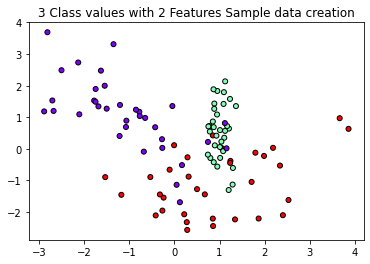

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes= 3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c= y_labels, s=25, cmap='rainbow', edgecolors='k')

In [15]:
import numpy as np

def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolors='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_Start, xlim_end = ax.get_xlim()
    ylim_Start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.rave()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1 ) - 0.5,
                           cmap = 'rainbow', clim = (y.mim(), y.max()),
                           zorder=1)    

# Voting Classifier

In [30]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [44]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft' )
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size = 0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0: 4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1: 4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도:  0.947368
LogisticRegression 정확도 :  0.938596
KNeighborsClassifier 정확도 :  0.938596


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old.feature_name_df.groupby('column_name'))